# Now We Start Cleaning Our Dataset

In [ ]:
# import python packages

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
import time
import re
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [ ]:
#read in the csv file of vacant lots/buildings in Harlem, the zipcode area of 10026 and 10027

In [ ]:
df=pd.read_csv('full_input_data.csv')

In [ ]:
#check the columns of the file

In [ ]:
df.head(5)

In [ ]:
#make a copy of the dataframe

In [ ]:
df_origin = df

In [ ]:
#clean the 'incident address' column

In [ ]:
#check if any of the address start with a space

In [ ]:
df.loc[df['Incident Address'].str.contains('^\s'),:]

In [ ]:
#locate those adressess spelling 'WEST' as 'W' and save them into a new dataframe df_W

In [ ]:
df_W = df.loc[df['Incident Address'].str.contains('^[0-9]+\sW\s*[0-9]+'),:]

In [ ]:
#replace 'W' as 'WEST'

In [ ]:
df_W['Incident Address'] = df_W['Incident Address'].str.replace('W','WEST')

In [ ]:
df_W

In [ ]:
#update rows in df with df_W

In [ ]:
df = df_W.combine_first(df)

In [ ]:
df

In [ ]:
#locate those adressess spelling 'STREET' as 'ST' and save them into a new dataframe df_st

In [ ]:
df_st = df.loc[df['Incident Address'].str.contains('\sST$'),:]

In [ ]:
df_st['Incident Address'] = df_st['Incident Address'].str.replace('ST$','STREET')

In [ ]:
df_st

In [ ]:
#update rows in df with df_st

In [ ]:
df = df_st.combine_first(df)

In [ ]:
# input csv file and prepare it for Selenium

In [ ]:
df=pd.read_csv('HarlemCleanedData.csv')

In [ ]:
df.head()

In [ ]:
#locate vacant lots

In [ ]:
df_vac = df.loc[df['Info_Accuracy'] == 'TRUE']

In [ ]:
#save df_vac to csv file

In [ ]:
df_vac.to_csv('HarlemVacOnly.csv',index=False)

In [ ]:
#save df_vac to df

In [ ]:
df=df_vac

# Setting Up Selenium Webdriver

In [ ]:
# Test one address with selenium and obtain its URL on NYC ZoLa

In [2]:
df=pd.read_csv('HarlemVacOnly.csv')

In [11]:
browser = webdriver.Chrome(executable_path=r"/Users/xuechenhu/Downloads/chromedriver")

In [12]:
browser.get('https://zola.planning.nyc.gov/about')

In [13]:
inputElement = browser.find_element_by_id("ember156")

In [14]:
inputElement.send_keys('701 WEST 135TH STREET')

In [18]:
inputElement.send_keys(Keys.ENTER)

In [19]:
browser.current_url

'https://zola.planning.nyc.gov/l/lot/1/2101/58?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false'

In [3]:
addresses = df['Incident Address']

In [61]:
#The scraping was done in three times due to the internet disconnection
#Every time it paused, I manually print the list and saved it into a text editor
#And at the end of the scraping, I saved it back to a list called ZoLaURL

In [52]:
new_addresses = addresses[81:]

In [53]:
len(new_addresses)

32

In [54]:
new_l=[]
browser = webdriver.Chrome(executable_path=r"/Users/xuechenhu/Downloads/chromedriver")
# keyword_list = addresses # Your list of keywords

def ZoLaSearch(ad):
    browser.get('https://zola.planning.nyc.gov/about')
    time.sleep(8)
    browser.find_element_by_id("ember156").send_keys(ad)
    time.sleep(4)
    browser.find_element_by_id("ember156").send_keys(Keys.ENTER)
    time.sleep(6)
    try:
        print(browser.current_url)
        new_l.append(browser.current_url)
    except:
        print('/')
        new_l.append('/')
    
    time.sleep(2)

for ad in new_addresses: 
    ZoLaSearch(ad) 

https://zola.planning.nyc.gov/l/lot/1/1723/53?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false#18.86/40.8075215/-73.9430905
https://zola.planning.nyc.gov/l/lot/1/1725/107?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%2

https://zola.planning.nyc.gov/l/lot/1/1932/5?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false
https://zola.planning.nyc.gov/l/lot/1/1969/7501?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1

https://zola.planning.nyc.gov/l/lot/1/1914/146?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false
https://zola.planning.nyc.gov/about#9.72/40.7125/-73.733
https://zola.planning.nyc.gov/l/lot/1/1725/68?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search

In [57]:
ZoLaURL = ['https://zola.planning.nyc.gov/l/lot/1/1901/29?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1599/69?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1846/57?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1847/11?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1828/56?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1847/34?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1718/27?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1902/126?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1717/53?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1847/65?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1717/62?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1717/162?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1717/167?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/about#9.72/40.7125/-73.733',
 'https://zola.planning.nyc.gov/l/lot/3/1646/40?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1904/15?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1848/7505?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1720/23?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1943/18?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1849/36?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1923/7501?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/3/2739/2?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1720/39?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1721/35?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1907/5?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1907/139?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1907/48?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1722/59?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1723/59?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1927/3?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/3/2713/1?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1929/23?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1927/61?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1911/7504?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1911/7504?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1726/13?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1913/53?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1913/153?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/about#9.72/40.7125/-73.733',
 'https://zola.planning.nyc.gov/l/lot/1/1953/21?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1954/31?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1954/31?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1953/41?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1954/136?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1954/38?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1953/62?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1954/55?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1937/148?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/2101/58?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1847/6?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1847/7?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/about#9.72/40.7125/-73.733',
 'https://zola.planning.nyc.gov/l/lot/1/1847/9?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1847/10?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1847/11?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false#18.86/40.802394/-73.9576126',
 'https://zola.planning.nyc.gov/l/lot/1/1847/7504?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1847/30?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1847/52?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/about#9.72/40.7125/-73.733',
 'https://zola.planning.nyc.gov/l/lot/1/1722/24?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1722/6?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1823/8?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1821/120?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1904/17?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1903/147?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/3/1646/39?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1718/4?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1718/131?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1717/150?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1717/7?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1717/6?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1720/51?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1718/149?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1718/55?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/about#9.72/40.7125/-73.733',
 'https://zola.planning.nyc.gov/l/lot/1/1924/27?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1944/36?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/about#9.72/40.7125/-73.733',
 'https://zola.planning.nyc.gov/l/lot/1/1907/15?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/about#9.72/40.7125/-73.733',
 'https://zola.planning.nyc.gov/l/lot/1/1944/29?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1723/53?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false#18.86/40.8075215/-73.9430905',
 'https://zola.planning.nyc.gov/l/lot/1/1725/107?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1725/7?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1725/6?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1950/128?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1948/24?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1948/23?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1948/35?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1954/36?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1955/7?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1953/41?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1953/25?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1932/5?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1969/7501?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1911/48?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1999/33?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1966/95?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1938/111?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1937/48?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1916/127?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1728/2?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1729/101?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1914/37?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1914/40?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1914/146?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/about#9.72/40.7125/-73.733',
 'https://zola.planning.nyc.gov/l/lot/1/1725/68?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1911/26?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1904/15?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1820/6?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/l/lot/1/1932/60?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false',
 'https://zola.planning.nyc.gov/about#9.72/40.7125/-73.733']

In [58]:
len(ZoLaURL)

113

In [62]:
#append the list to dataframe

In [59]:
df['ZoLaURL'] = ZoLaURL

In [64]:
#locate unsuccessful scraping

In [66]:
df_fail = df.loc[df['ZoLaURL'] == 'https://zola.planning.nyc.gov/about#9.72/40.7125/-73.733']

In [68]:
fail_manual = ['https://zola.planning.nyc.gov/l/lot/1/1831/2?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false#19.3/40.803773/-73.9552079',
              'https://zola.planning.nyc.gov/l/lot/1/1915/32?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false#19.41/40.811374/-73.9431317',
              'https://zola.planning.nyc.gov/l/lot/1/1847/8?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false#18.87/40.8024605/-73.9577702',
              'https://zola.planning.nyc.gov/l/lot/1/1923/16?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false#18.26/40.804736/-73.952929',
              '',
              'https://zola.planning.nyc.gov/l/lot/1/1907/115?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false#18.84/40.8066635/-73.9479509',
               'https://zola.planning.nyc.gov/l/lot/1/1722/6?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false#18.83/40.807025/-73.9448988',
               'https://zola.planning.nyc.gov/l/lot/1/1913/52?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false#18.8/40.810843/-73.945144',
               'https://zola.planning.nyc.gov/l/lot/1/1912/64?aerial-year=aerials-2016&layer-groups=%5B%22building-footprints%22%2C%22commercial-overlays%22%2C%22street-centerlines%22%2C%22subway%22%2C%22tax-lots%22%2C%22zoning-districts%22%5D&print=false&search=true&selectedOverlays=%5B%22C1-1%22%2C%22C1-2%22%2C%22C1-3%22%2C%22C1-4%22%2C%22C1-5%22%2C%22C2-1%22%2C%22C2-2%22%2C%22C2-3%22%2C%22C2-4%22%2C%22C2-5%22%5D&selectedZoning=%5B%22BP%22%2C%22C1%22%2C%22C2%22%2C%22C3%22%2C%22C4%22%2C%22C5%22%2C%22C6%22%2C%22C7%22%2C%22C8%22%2C%22M1%22%2C%22M2%22%2C%22M3%22%2C%22PA%22%2C%22R1%22%2C%22R10%22%2C%22R2%22%2C%22R3%22%2C%22R4%22%2C%22R5%22%2C%22R6%22%2C%22R7%22%2C%22R8%22%2C%22R9%22%5D&shouldRefresh=false#19.61/40.81046/-73.9465969'
              ]

In [69]:
len(fail_manual)

9

In [71]:
df_fail['ManualURL'] = fail_manual

/Users/xuechenhu/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
# del df_fail['ZoLaURL']

In [75]:
df_fail.rename(columns={'ManualURL':'ZoLaURL'}, inplace=True)

/Users/xuechenhu/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [76]:
df_fail

,Unique Key,Descriptor,Location Type,Incident Zip,Incident Address,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location,geometry,year,Info_Accuracy,Vacancy_Type,Current_Status,Repeated,Comment,ZoLaURL
13,32015351,Rat Sighting,Vacant Building,10026,2132-2142 FREDERICK DOUGLASS BOULEVARD,996504,232161,40.8038957,-73.955738,"(40.803895736498006, -73.95573755557322)",POINT (-73.95573755557322 40.80389573649801),2015,True,VL,VACANT,False,NaN,https://zola.planning.nyc.gov/l/lot/1/1831/2?a...
38,36730024,Rat Sighting,Vacant Lot,10027,407-401 MALCOLM X BOULEVARD,999992,234794,40.8111171,-73.943132,"(40.81111706638301, -73.94313244487026)",POINT (-73.94313244487026 40.81111706638301),2017,True,VL,CONST,False,NYC HOUSING,https://zola.planning.nyc.gov/l/lot/1/1915/32?...
51,/,311related,311related,/,323 WEST 112 STREET,/,/,/,/,/,/,/,True,NEW BUILDING,NEW BUILDING,False,NaN,https://zola.planning.nyc.gov/l/lot/1/1847/8?a...
58,/,311related,311related,/,251 WEST 117 STREET,/,/,/,/,/,/,/,True,VB,CONST,False,NaN,https://zola.planning.nyc.gov/l/lot/1/1923/16?...
74,/,311related,311related,/,202 WEST 121 STREET,/,/,/,/,/,/,/,True,VL FOR SALE,VACANT,False,NaN,
77,/,311related,311related,/,135 WEST 122 STREET,/,/,/,/,/,/,/,True,VB,VACANT,False,NYC HISTORIC PROPERTIES,https://zola.planning.nyc.gov/l/lot/1/1907/115...
79,/,311related,311related,/,75 WEST 124 STREET,/,/,/,/,/,/,/,True,VL,VACANT,False,NaN,https://zola.planning.nyc.gov/l/lot/1/1722/6?a...
106,/,311related,311related,/,142 WEST 129 STREET,/,/,/,/,/,/,/,True,VL,VACANT,False,NaN,https://zola.planning.nyc.gov/l/lot/1/1913/52?...
112,/,311related,311related,/,2153 Adam Clayton Powell Jr Blvd,/,/,/,/,/,/,/,True,NEW BUILDING,NEW BUILDING,False,NaN,https://zola.planning.nyc.gov/l/lot/1/1912/64?...


In [80]:
#df = df_fail.combine_first(df)

In [82]:
#Now save the dataframe with ZoLa URL to csv

In [83]:
df.to_csv('HarlemVacWithZoLa.csv',index=False)

# Clean Data From ZoLa

The original plan was to use beautiful soup to scrape property information from attained ZoLa urls. However, the webpage of ZoLa contains multiple programming languages, html and json. And the property information is packed in json script. Therefore, the information is collected manually. And from here, let's clean our data for the last time before analysis. 

In [109]:
#input dataset with property info

In [110]:
df=pd.read_csv('HarlemFinalData.csv')

In [111]:
df.head()

,Unique Key,Descriptor,Location Type,Incident Zip,Incident Address,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location,...,Comment,ZoLaURL,Owner,LandUse,LotArea,YearBuilt,YearAltered,GrossFloorArea,ResUnits,Unnamed: 25
0,40977440,Condition Attracting Rodents,Vacant Lot,10026,101 WEST 116 STREET,997928,231295,40.8015167,-73.950596,"(40.801516714673454, -73.95059571702271)",...,NaN,https://zola.planning.nyc.gov/l/lot/1/1901/29?...,MITCHELL MEKLES,Mixed Residential & Commercial Buildings,"20,022 sq ft",1920.0,1985.0,"51,072 sq ft",2.0,NaN
1,39473680,Condition Attracting Rodents,Vacant Lot,10026,68 WEST 116TH STREET,998254,231326,40.8016013,-73.949418,"(40.80160129050896, -73.94941815618962)",...,NaN,https://zola.planning.nyc.gov/l/lot/1/1599/69?...,NYC HOUSING PRESERVATION AND DEVELOPMENT,Vacant Land,"3,028 sq ft",NaN,NaN,NaN,NaN,NaN
2,15956897,Rat Sighting,Vacant Lot,10026,316 WEST 112 STREET,995981,231474,40.8020108,-73.957628,"(40.80201082006091, -73.95762787413892)",...,NaN,https://zola.planning.nyc.gov/l/lot/1/1846/57?...,316 W 112 STREET HDFC,Multi-Family Walk-Up Buildings,"3,292 sq ft",1900.0,1986.0,"14,870 sq ft",10.0,NaN
3,18607356,Condition Attracting Rodents,Vacant Lot,10026,317 WEST 112 STREET,995984,231479,40.8020245,-73.957617,"(40.80202453970612, -73.95761702946545)",...,NaN,https://zola.planning.nyc.gov/l/lot/1/1847/11?...,MIKEDP VENTURES LLC I,Multi-Family Walk-Up Buildings,"1,682 sq ft",1900.0,1999.0,"3,333 sq ft",3.0,NaN
4,31411266,Rat Sighting,Vacant Lot,10026,270 WEST 113 STREET,996454,231512,40.8021145,-73.955919,"(40.802114478991, -73.95591933927666)",...,NaN,https://zola.planning.nyc.gov/l/lot/1/1828/56?...,NYC DEPARTMENT OF EDUCATION,Vacant Land,"1,817 sq ft",NaN,NaN,NaN,NaN,NaN


In [112]:
#drop the empty column

In [114]:
# del df['Unnamed: 25']

In [116]:
#drop unnecessary coloumns

In [117]:
# del df['Repeated']

In [118]:
df.head()

,Unique Key,Descriptor,Location Type,Incident Zip,Incident Address,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location,...,Current_Status,Comment,ZoLaURL,Owner,LandUse,LotArea,YearBuilt,YearAltered,GrossFloorArea,ResUnits
0,40977440,Condition Attracting Rodents,Vacant Lot,10026,101 WEST 116 STREET,997928,231295,40.8015167,-73.950596,"(40.801516714673454, -73.95059571702271)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1901/29?...,MITCHELL MEKLES,Mixed Residential & Commercial Buildings,"20,022 sq ft",1920.0,1985.0,"51,072 sq ft",2.0
1,39473680,Condition Attracting Rodents,Vacant Lot,10026,68 WEST 116TH STREET,998254,231326,40.8016013,-73.949418,"(40.80160129050896, -73.94941815618962)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1599/69?...,NYC HOUSING PRESERVATION AND DEVELOPMENT,Vacant Land,"3,028 sq ft",NaN,NaN,NaN,NaN
2,15956897,Rat Sighting,Vacant Lot,10026,316 WEST 112 STREET,995981,231474,40.8020108,-73.957628,"(40.80201082006091, -73.95762787413892)",...,NEW BUILDING,NaN,https://zola.planning.nyc.gov/l/lot/1/1846/57?...,316 W 112 STREET HDFC,Multi-Family Walk-Up Buildings,"3,292 sq ft",1900.0,1986.0,"14,870 sq ft",10.0
3,18607356,Condition Attracting Rodents,Vacant Lot,10026,317 WEST 112 STREET,995984,231479,40.8020245,-73.957617,"(40.80202453970612, -73.95761702946545)",...,NEW BUILDING,NaN,https://zola.planning.nyc.gov/l/lot/1/1847/11?...,MIKEDP VENTURES LLC I,Multi-Family Walk-Up Buildings,"1,682 sq ft",1900.0,1999.0,"3,333 sq ft",3.0
4,31411266,Rat Sighting,Vacant Lot,10026,270 WEST 113 STREET,996454,231512,40.8021145,-73.955919,"(40.802114478991, -73.95591933927666)",...,COMMON PLACE,NaN,https://zola.planning.nyc.gov/l/lot/1/1828/56?...,NYC DEPARTMENT OF EDUCATION,Vacant Land,"1,817 sq ft",NaN,NaN,NaN,NaN


In [119]:
#rename column LotArea

In [120]:
df.rename(columns={'LotArea':'LotArea/sqft'}, inplace=True)

In [ ]:
#reformat LotArea/sqft column

In [122]:
df['LotArea/sqft'].replace(regex=True,inplace=True,to_replace=r'sq\sft.*$',value=r'')

In [124]:
#rename GrossFloorArea column

In [125]:
df.rename(columns={'GrossFloorArea':'GrossFloorArea/sqft'}, inplace=True)

In [126]:
#reformat LotArea/sqft column

In [127]:
df['GrossFloorArea/sqft'].replace(regex=True,inplace=True,to_replace=r'sq\sft.*$',value=r'')

In [132]:
#change data formats of LotArea/sqft and GrossFloorArea/sqft to float

In [129]:
df["LotArea/sqft"] = df["LotArea/sqft"].str.replace(",","").astype(float)

In [131]:
df["GrossFloorArea/sqft"] = df["GrossFloorArea/sqft"].str.replace(",","").astype(float)

In [136]:
df['Current_Status'].unique()

array(['VACANT', 'NEW BUILDING', 'COMMON PLACE', 'CONST', 'GARDEN',
       'COST'], dtype=object)

In [140]:
#fix typo COST to CONST

In [138]:
df.loc[102:'COST','Current_Status'] = 'CONST'

In [ ]:
#put vacant properties under a new dataframe df_vac

In [143]:
df_vac = df.loc[df['Current_Status']== 'VACANT']

In [144]:
#put properties under construction into a new dataframe df_const

In [145]:
df_const = df.loc[df['Current_Status']== 'CONST']

In [147]:
#put newly constructed properties under a new dataframe df_new

In [148]:
df_new = df.loc[df['Current_Status']== 'NEW BUILDING']

# Analysis!

### How last-altered years are distributed in vacant buildings?

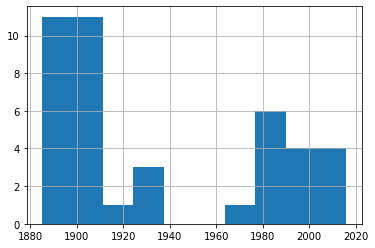

In [151]:
df_vac['YearAltered'].hist()

### What about buildings under construction? How the built-years are distributed?

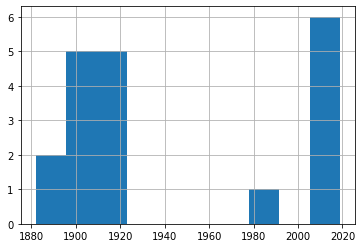

In [153]:
df_const['YearBuilt'].hist()

### How many vacant properties are vacant lands?

In [154]:
#Have a look at the dataset first

In [155]:
df_vac.head()

,Unique Key,Descriptor,Location Type,Incident Zip,Incident Address,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location,...,Current_Status,Comment,ZoLaURL,Owner,LandUse,LotArea/sqft,YearBuilt,YearAltered,GrossFloorArea/sqft,ResUnits
0,40977440,Condition Attracting Rodents,Vacant Lot,10026,101 WEST 116 STREET,997928,231295,40.8015167,-73.950596,"(40.801516714673454, -73.95059571702271)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1901/29?...,MITCHELL MEKLES,Mixed Residential & Commercial Buildings,20022.0,1920.0,1985.0,51072.0,2.0
1,39473680,Condition Attracting Rodents,Vacant Lot,10026,68 WEST 116TH STREET,998254,231326,40.8016013,-73.949418,"(40.80160129050896, -73.94941815618962)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1599/69?...,NYC HOUSING PRESERVATION AND DEVELOPMENT,Vacant Land,3028.0,NaN,NaN,NaN,NaN
5,30761414,Rat Sighting,Vacant Lot,10026,318 WEST 113 STREET,996107,231705,40.8026447,-73.957172,"(40.802644683490584, -73.95717235691977)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1847/34?...,ROLLINS 113 LLC,Multi-Family Walk-Up Buildings,1682.0,1905.0,1905.0,3200.0,3.0
7,40246730,Condition Attracting Rodents,Vacant Building,10026,107 WEST 117 STREET,998117,231841,40.803015,-73.949912,"(40.80301504020598, -73.94991193053295)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1902/126...,"CHARLES, DON HOGAN",Multi-Family Walk-Up Buildings,2018.0,1920.0,1920.0,6156.0,4.0
8,29629050,Rat Sighting,Vacant Building,10026,42 WEST 119TH STREET,999010,231847,40.8030301,-73.946686,"(40.803030061926194, -73.94668637214029)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1717/53?...,MARCUS GARVEY PARK HOMES HDFC,Multi-Family Walk-Up Buildings,1817.0,1891.0,1891.0,3564.0,3.0


In [166]:
#save vacant lands into df_vl

In [164]:
df_vl = df_vac.loc[df_vac['LandUse'].str.contains('Vacant',na=False)]

In [167]:
df_vl.count()

Unique Key                    17
Descriptor                    17
Location Type                 17
Incident Zip                  17
Incident Address              17
X Coordinate (State Plane)    17
Y Coordinate (State Plane)    17
Latitude                      17
Longitude                     17
Location                      17
geometry                      17
year                          17
Info_Accuracy                 17
Vacancy_Type                  17
Current_Status                17
Comment                        3
ZoLaURL                       17
Owner                         17
LandUse                       17
LotArea/sqft                  17
YearBuilt                      0
YearAltered                    0
GrossFloorArea/sqft            0
ResUnits                       0
dtype: int64

### How many square feet of vacant lands are there in Harlem

In [168]:
df_vl['LotArea/sqft'].sum()

47704.0

### Are these vacant lands owned one or multiple owners?

In [173]:
df_vl['Owner'].value_counts()

101 WEST LLC                                         2
S AND S 2371 LLC                                     2
NYC HOUSING PRESERVATION AND DEVELOPMENT             1
2262 FREDRICK DOUGLAS BOULEVARD LLC                  1
258 SAINT NICHOLAS AVENUE                            1
ORANGE BRICK GARAGECORP                              1
NYC DEPARTMENT OF PARKS AND RECREATION               1
2136 FREDERICK DOUGLASS BOULEVARD, LLC               1
HANDYMDS MOST PURE HE                                1
JENCO 121 LLC                                        1
ABJ MILANO, LLC                                      1
PROPERTY1 HOLDINGS LLC                               1
38 WEST 126TH STREET REALTY LLC                      1
HCCI BALTON HOUSING DEVELOPMENT FUND COR PORATION    1
303 WEST 113TH OWNER, LLC                            1
Name: Owner, dtype: int64

In [174]:
#Owned by multiple owners. 3
#out of 17 vacant lands are owned either by city department or by city sponsored housing program

### How many vacant buildings are there in Harlem

In [175]:
df_vb = df_vac.loc[~df_vac['LandUse'].str.contains('Vacant',na=False)]

In [177]:
df_vb.count()

Unique Key                    43
Descriptor                    43
Location Type                 43
Incident Zip                  43
Incident Address              43
X Coordinate (State Plane)    43
Y Coordinate (State Plane)    43
Latitude                      43
Longitude                     43
Location                      43
geometry                      43
year                          43
Info_Accuracy                 43
Vacancy_Type                  43
Current_Status                43
Comment                        8
ZoLaURL                       42
Owner                         41
LandUse                       41
LotArea/sqft                  41
YearBuilt                     41
YearAltered                   41
GrossFloorArea/sqft           41
ResUnits                      37
dtype: int64

In [179]:
#43

### How many square feet of floor areas are there in vacant buildings in Harlem?

In [180]:
df_vb['GrossFloorArea/sqft'].sum()

245377.0

### How many residential units are there in vacant buildings?

In [181]:
df_vb['ResUnits'].sum()

246.0

In [221]:
df_vb_res = df_vb.loc[df_vb['LandUse'].str.contains('family|residential', flags=re.IGNORECASE, regex=True,na=False)]

### How many floor areas are there in vacant buildings of residential use?

In [222]:
df_vb_res['GrossFloorArea/sqft'].sum()

217901.0

### Are they owned by multiple owners?

In [182]:
df_vb['Owner'].value_counts()

MARCUS GARVEY PARK HOMES HDFC               3
NYC HOUSING PRESERVATION AND DEVELOPMENT    2
DOUGLAS-WORGHS RLTYCORP                     2
TROPPER, GISELLE                            1
MUJALLI, MOHAMMAD                           1
115 WEST 111TH ST LLC                       1
WFHA BROOKLYN RESTORATION L.P.              1
HOMESIDE DEVELOPMENT CORP.                  1
ROLLINS 113 LLC                             1
G2 HOUSES, INC.                             1
CROSSCAP HOLDINGS LLC                       1
JOHNSON, CHERYL Y.                          1
M3S3 LLC                                    1
DAVID, COHN                                 1
311 W 126TH STREET LLC                      1
327 WEST 126, LLC                           1
M&K REAL ESTATE HOLDINGS CORP               1
PATRICK SYBIL J                             1
NIRVAL ASSOCIATES INC                       1
ZAM ZAM REALTY INC.                         1
130 WEST 123 LLC                            1
EA 132ND LLC                      

In [183]:
#diverse owners, 2 out of 43 vacant buildings are city preserved

### How many vacant buildings are residential buildings?

In [189]:
df_vb_res = df_vb.loc[df_vb['LandUse'].str.contains('family|residential', flags=re.IGNORECASE, regex=True,na=False)]

In [190]:
df_vb_res.count()

Unique Key                    37
Descriptor                    37
Location Type                 37
Incident Zip                  37
Incident Address              37
X Coordinate (State Plane)    37
Y Coordinate (State Plane)    37
Latitude                      37
Longitude                     37
Location                      37
geometry                      37
year                          37
Info_Accuracy                 37
Vacancy_Type                  37
Current_Status                37
Comment                        5
ZoLaURL                       37
Owner                         37
LandUse                       37
LotArea/sqft                  37
YearBuilt                     37
YearAltered                   37
GrossFloorArea/sqft           37
ResUnits                      37
dtype: int64

In [191]:
#37

### How many floor areas?

In [192]:
df_vb_res['GrossFloorArea/sqft'].sum()

217901.0

### How many units?

In [193]:
df_vb_res['ResUnits'].sum()

246.0

### How many floor areas are under construction?

In [195]:
df_const['GrossFloorArea/sqft'].sum()

810394.0

### Units?

In [196]:
df_const['ResUnits'].sum()

560.0

In [197]:
### On the way, but these used to be vacant till recent

### What about new buildings?

In [209]:
#create a dataframe for new buildings

In [214]:
df_new = df.loc[df['Current_Status']=='NEW BUILDING']

In [211]:
df_new.count()

Unique Key                    22
Descriptor                    22
Location Type                 22
Incident Zip                  22
Incident Address              22
X Coordinate (State Plane)    22
Y Coordinate (State Plane)    22
Latitude                      22
Longitude                     22
Location                      22
geometry                      22
year                          22
Info_Accuracy                 22
Vacancy_Type                  22
Current_Status                22
Comment                        1
ZoLaURL                       22
Owner                         22
LandUse                       22
LotArea/sqft                  22
YearBuilt                     22
YearAltered                   22
GrossFloorArea/sqft           22
ResUnits                      22
dtype: int64

In [223]:
df_new['ResUnits'].sum()

785.0

In [224]:
df_new['GrossFloorArea/sqft'].sum()

335574.0

### What about buildings under constructions?

In [215]:
df_const = df.loc[df['Current_Status']=='CONST']

In [219]:
df_const.count()

Unique Key                    27
Descriptor                    27
Location Type                 27
Incident Zip                  27
Incident Address              27
X Coordinate (State Plane)    27
Y Coordinate (State Plane)    27
Latitude                      27
Longitude                     27
Location                      27
geometry                      27
year                          27
Info_Accuracy                 27
Vacancy_Type                  27
Current_Status                27
Comment                        7
ZoLaURL                       27
Owner                         26
LandUse                       26
LotArea/sqft                  26
YearBuilt                     19
YearAltered                   18
GrossFloorArea/sqft           19
ResUnits                      16
dtype: int64

### Now creating csv files for readers

In [227]:
df_vacant_bldg = df_vac

In [229]:
df_vacant_bldg.dropna(subset=['GrossFloorArea/sqft'])

,Unique Key,Descriptor,Location Type,Incident Zip,Incident Address,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location,...,Current_Status,Comment,ZoLaURL,Owner,LandUse,LotArea/sqft,YearBuilt,YearAltered,GrossFloorArea/sqft,ResUnits
0,40977440,Condition Attracting Rodents,Vacant Lot,10026,101 WEST 116 STREET,997928,231295,40.8015167,-73.950596,"(40.801516714673454, -73.95059571702271)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1901/29?...,MITCHELL MEKLES,Mixed Residential & Commercial Buildings,20022.0,1920.0,1985.0,51072.0,2.0
5,30761414,Rat Sighting,Vacant Lot,10026,318 WEST 113 STREET,996107,231705,40.8026447,-73.957172,"(40.802644683490584, -73.95717235691977)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1847/34?...,ROLLINS 113 LLC,Multi-Family Walk-Up Buildings,1682.0,1905.0,1905.0,3200.0,3.0
7,40246730,Condition Attracting Rodents,Vacant Building,10026,107 WEST 117 STREET,998117,231841,40.803015,-73.949912,"(40.80301504020598, -73.94991193053295)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1902/126...,"CHARLES, DON HOGAN",Multi-Family Walk-Up Buildings,2018.0,1920.0,1920.0,6156.0,4.0
8,29629050,Rat Sighting,Vacant Building,10026,42 WEST 119TH STREET,999010,231847,40.8030301,-73.946686,"(40.803030061926194, -73.94668637214029)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1717/53?...,MARCUS GARVEY PARK HOMES HDFC,Multi-Family Walk-Up Buildings,1817.0,1891.0,1891.0,3564.0,3.0
10,29609153,Rat Sighting,Vacant Building,10026,66 WEST 119TH STREET,998811,231960,40.8033405,-73.947405,"(40.80334054604667, -73.94740492174644)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1717/62?...,DOUGLAS-WORGHS RLTYCORP,Multi-Family Walk-Up Buildings,1615.0,1894.0,1894.0,2541.0,7.0
11,31657978,Rat Sighting,Vacant Building,10026,68 WEST 119TH STREET,998796,231967,40.8033598,-73.947459,"(40.803359783828654, -73.9474590873366)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1717/162...,DOUGLAS-WORGHS RLTYCORP,Multi-Family Walk-Up Buildings,1615.0,1894.0,1895.0,2541.0,8.0
12,28120487,Rat Sighting,Vacant Lot,10026,82 WEST 119 STREET,998869,232016,40.8034942,-73.947195,"(40.80349415487052, -73.94719530089077)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1717/167...,NIRVAL ASSOCIATES INC,Multi-Family Walk-Up Buildings,1615.0,1885.0,1885.0,2595.0,4.0
14,43768948,Rat Sighting,Vacant Building,10026,190 MALCOLM X BOULEVARD,998645,232313,40.8043097,-73.948004,"(40.80430970590395, -73.94800376526184)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/3/1646/40?...,MALCOLM GOLD LLC,Multi-Family Walk-Up Buildings,2500.0,2009.0,2009.0,4011.0,3.0
15,41621967,Rat Sighting,Vacant Building,10026,135 WEST 119 STREET,998260,232360,40.8044393,-73.949394,"(40.80443932682152, -73.94939432684862)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1904/15?...,MARCUS GARVEY PARK HOMES HDFC,Multi-Family Walk-Up Buildings,2018.0,1898.0,1898.0,3885.0,10.0
17,40705197,Rat Sighting,Vacant Building,10027,8 WEST 121 STREET,999069,232413,40.8045835,-73.946472,"(40.80458347738907, -73.94647201288603)",...,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1720/23?...,"G2 HOUSES, INC.",Multi-Family Walk-Up Buildings,2018.0,1890.0,1890.0,6195.0,3.0


In [230]:
df_vacant_bldg = df_vacant_bldg[['Incident Address','Owner','LandUse','YearBuilt','YearAltered','GrossFloorArea/sqft','ResUnits','ZoLaURL']]

In [232]:
df_vacant_bldg.to_csv('VacantBldg.csv',index=False)

In [235]:
df_vacant_lots = df_vl

In [236]:
df_vacant_lots = df_vacant_lots[['Incident Address','Owner','LandUse','LotArea/sqft','ZoLaURL']]

In [238]:
df_vacant_lots.to_csv('VacantLots.csv',index=False)

In [239]:
df_const_new = df_const.append(df_new, ignore_index=True)

In [242]:
df_const_new = df_const_new[['Incident Address','YearAltered','Owner','LandUse','LotArea/sqft','ZoLaURL']]

In [243]:
df_const_new.to_csv('ConsAndNew.csv',index=False)

In [248]:
df_business= df.loc[~df['LandUse'].str.contains('family|residential|housing',flags=re.IGNORECASE, regex=True,na=False)]

In [249]:
df_business = df_business[['Incident Address','Owner','LandUse','YearBuilt','YearAltered','GrossFloorArea/sqft','LotArea/sqft','ZoLaURL']]

In [251]:
df_business.to_csv('VacantBusiAndFacilities.csv',index=False)

In [253]:
df.count()

Unique Key                    113
Descriptor                    113
Location Type                 113
Incident Zip                  113
Incident Address              113
X Coordinate (State Plane)    113
Y Coordinate (State Plane)    113
Latitude                      113
Longitude                     113
Location                      113
geometry                      113
year                          113
Info_Accuracy                 113
Vacancy_Type                  113
Current_Status                113
Comment                        19
ZoLaURL                       112
Owner                         110
LandUse                       110
LotArea/sqft                  110
YearBuilt                      82
YearAltered                    81
GrossFloorArea/sqft            82
ResUnits                       75
dtype: int64

In [258]:
df.drop(['Unique Key', 'Descriptor', 'Location Type','Incident Zip','X Coordinate (State Plane)'],axis=1,inplace = True)

In [259]:
df

,Incident Address,Y Coordinate (State Plane),Latitude,Longitude,Location,geometry,year,Info_Accuracy,Vacancy_Type,Current_Status,Comment,ZoLaURL,Owner,LandUse,LotArea/sqft,YearBuilt,YearAltered,GrossFloorArea/sqft,ResUnits
0,101 WEST 116 STREET,231295,40.8015167,-73.950596,"(40.801516714673454, -73.95059571702271)",POINT (-73.95059571702271 40.80151671467345),2018,True,VB,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1901/29?...,MITCHELL MEKLES,Mixed Residential & Commercial Buildings,20022.0,1920.0,1985.0,51072.0,2.0
1,68 WEST 116TH STREET,231326,40.8016013,-73.949418,"(40.80160129050896, -73.94941815618962)",POINT (-73.94941815618962 40.80160129050896),2018,True,VL,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1599/69?...,NYC HOUSING PRESERVATION AND DEVELOPMENT,Vacant Land,3028.0,NaN,NaN,NaN,NaN
2,316 WEST 112 STREET,231474,40.8020108,-73.957628,"(40.80201082006091, -73.95762787413892)",POINT (-73.95762787413892 40.80201082006091),2010,True,NEW BUILDING,NEW BUILDING,NaN,https://zola.planning.nyc.gov/l/lot/1/1846/57?...,316 W 112 STREET HDFC,Multi-Family Walk-Up Buildings,3292.0,1900.0,1986.0,14870.0,10.0
3,317 WEST 112 STREET,231479,40.8020245,-73.957617,"(40.80202453970612, -73.95761702946545)",POINT (-73.95761702946545 40.80202453970612),2010,True,NEW BUILDING,NEW BUILDING,NaN,https://zola.planning.nyc.gov/l/lot/1/1847/11?...,MIKEDP VENTURES LLC I,Multi-Family Walk-Up Buildings,1682.0,1900.0,1999.0,3333.0,3.0
4,270 WEST 113 STREET,231512,40.8021145,-73.955919,"(40.802114478991, -73.95591933927666)",POINT (-73.95591933927666 40.802114478991),2015,True,COMMON PLACE,COMMON PLACE,NaN,https://zola.planning.nyc.gov/l/lot/1/1828/56?...,NYC DEPARTMENT OF EDUCATION,Vacant Land,1817.0,NaN,NaN,NaN,NaN
5,318 WEST 113 STREET,231705,40.8026447,-73.957172,"(40.802644683490584, -73.95717235691977)",POINT (-73.95717235691977 40.80264468349058),2015,True,VL,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1847/34?...,ROLLINS 113 LLC,Multi-Family Walk-Up Buildings,1682.0,1905.0,1905.0,3200.0,3.0
6,23 WEST 119 STREET,231828,40.8029776,-73.945924,"(40.80297755715398, -73.94592427543851)",POINT (-73.94592427543851 40.80297755715398),2011,True,VB,CONST,NYC HOUSING,https://zola.planning.nyc.gov/l/lot/1/1718/27?...,MLG 904 HOUSING DEVELOPMENT FUND CORPORA TION,Multi-Family Walk-Up Buildings,5044.0,1909.0,1994.0,19146.0,24.0
7,107 WEST 117 STREET,231841,40.803015,-73.949912,"(40.80301504020598, -73.94991193053295)",POINT (-73.94991193053295 40.80301504020598),2018,True,VB,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1902/126...,"CHARLES, DON HOGAN",Multi-Family Walk-Up Buildings,2018.0,1920.0,1920.0,6156.0,4.0
8,42 WEST 119TH STREET,231847,40.8030301,-73.946686,"(40.803030061926194, -73.94668637214029)",POINT (-73.94668637214029 40.80303006192619),2015,True,VB,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1717/53?...,MARCUS GARVEY PARK HOMES HDFC,Multi-Family Walk-Up Buildings,1817.0,1891.0,1891.0,3564.0,3.0
9,310 WEST 114 STREET,231940,40.8032895,-73.956757,"(40.80328953886836, -73.95675655641215)",POINT (-73.95675655641216 40.80328953886836),2010,True,NEW BUILDING,NEW BUILDING,NaN,https://zola.planning.nyc.gov/l/lot/1/1847/65?...,WEST 114 LLC,Multi-Family Elevator Buildings,2624.0,2015.0,2015.0,12554.0,8.0


In [260]:
df.drop(['Y Coordinate (State Plane)', 'Location', 'geometry','Info_Accuracy','Vacancy_Type'],axis=1,inplace = True)

In [261]:
df

,Incident Address,Latitude,Longitude,year,Current_Status,Comment,ZoLaURL,Owner,LandUse,LotArea/sqft,YearBuilt,YearAltered,GrossFloorArea/sqft,ResUnits
0,101 WEST 116 STREET,40.8015167,-73.950596,2018,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1901/29?...,MITCHELL MEKLES,Mixed Residential & Commercial Buildings,20022.0,1920.0,1985.0,51072.0,2.0
1,68 WEST 116TH STREET,40.8016013,-73.949418,2018,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1599/69?...,NYC HOUSING PRESERVATION AND DEVELOPMENT,Vacant Land,3028.0,NaN,NaN,NaN,NaN
2,316 WEST 112 STREET,40.8020108,-73.957628,2010,NEW BUILDING,NaN,https://zola.planning.nyc.gov/l/lot/1/1846/57?...,316 W 112 STREET HDFC,Multi-Family Walk-Up Buildings,3292.0,1900.0,1986.0,14870.0,10.0
3,317 WEST 112 STREET,40.8020245,-73.957617,2010,NEW BUILDING,NaN,https://zola.planning.nyc.gov/l/lot/1/1847/11?...,MIKEDP VENTURES LLC I,Multi-Family Walk-Up Buildings,1682.0,1900.0,1999.0,3333.0,3.0
4,270 WEST 113 STREET,40.8021145,-73.955919,2015,COMMON PLACE,NaN,https://zola.planning.nyc.gov/l/lot/1/1828/56?...,NYC DEPARTMENT OF EDUCATION,Vacant Land,1817.0,NaN,NaN,NaN,NaN
5,318 WEST 113 STREET,40.8026447,-73.957172,2015,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1847/34?...,ROLLINS 113 LLC,Multi-Family Walk-Up Buildings,1682.0,1905.0,1905.0,3200.0,3.0
6,23 WEST 119 STREET,40.8029776,-73.945924,2011,CONST,NYC HOUSING,https://zola.planning.nyc.gov/l/lot/1/1718/27?...,MLG 904 HOUSING DEVELOPMENT FUND CORPORA TION,Multi-Family Walk-Up Buildings,5044.0,1909.0,1994.0,19146.0,24.0
7,107 WEST 117 STREET,40.803015,-73.949912,2018,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1902/126...,"CHARLES, DON HOGAN",Multi-Family Walk-Up Buildings,2018.0,1920.0,1920.0,6156.0,4.0
8,42 WEST 119TH STREET,40.8030301,-73.946686,2015,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1717/53?...,MARCUS GARVEY PARK HOMES HDFC,Multi-Family Walk-Up Buildings,1817.0,1891.0,1891.0,3564.0,3.0
9,310 WEST 114 STREET,40.8032895,-73.956757,2010,NEW BUILDING,NaN,https://zola.planning.nyc.gov/l/lot/1/1847/65?...,WEST 114 LLC,Multi-Family Elevator Buildings,2624.0,2015.0,2015.0,12554.0,8.0


In [262]:
df.rename(columns={'year':'311ComplainedYear'}, inplace=True)

In [263]:
df

,Incident Address,Latitude,Longitude,311ComplainedYear,Current_Status,Comment,ZoLaURL,Owner,LandUse,LotArea/sqft,YearBuilt,YearAltered,GrossFloorArea/sqft,ResUnits
0,101 WEST 116 STREET,40.8015167,-73.950596,2018,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1901/29?...,MITCHELL MEKLES,Mixed Residential & Commercial Buildings,20022.0,1920.0,1985.0,51072.0,2.0
1,68 WEST 116TH STREET,40.8016013,-73.949418,2018,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1599/69?...,NYC HOUSING PRESERVATION AND DEVELOPMENT,Vacant Land,3028.0,NaN,NaN,NaN,NaN
2,316 WEST 112 STREET,40.8020108,-73.957628,2010,NEW BUILDING,NaN,https://zola.planning.nyc.gov/l/lot/1/1846/57?...,316 W 112 STREET HDFC,Multi-Family Walk-Up Buildings,3292.0,1900.0,1986.0,14870.0,10.0
3,317 WEST 112 STREET,40.8020245,-73.957617,2010,NEW BUILDING,NaN,https://zola.planning.nyc.gov/l/lot/1/1847/11?...,MIKEDP VENTURES LLC I,Multi-Family Walk-Up Buildings,1682.0,1900.0,1999.0,3333.0,3.0
4,270 WEST 113 STREET,40.8021145,-73.955919,2015,COMMON PLACE,NaN,https://zola.planning.nyc.gov/l/lot/1/1828/56?...,NYC DEPARTMENT OF EDUCATION,Vacant Land,1817.0,NaN,NaN,NaN,NaN
5,318 WEST 113 STREET,40.8026447,-73.957172,2015,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1847/34?...,ROLLINS 113 LLC,Multi-Family Walk-Up Buildings,1682.0,1905.0,1905.0,3200.0,3.0
6,23 WEST 119 STREET,40.8029776,-73.945924,2011,CONST,NYC HOUSING,https://zola.planning.nyc.gov/l/lot/1/1718/27?...,MLG 904 HOUSING DEVELOPMENT FUND CORPORA TION,Multi-Family Walk-Up Buildings,5044.0,1909.0,1994.0,19146.0,24.0
7,107 WEST 117 STREET,40.803015,-73.949912,2018,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1902/126...,"CHARLES, DON HOGAN",Multi-Family Walk-Up Buildings,2018.0,1920.0,1920.0,6156.0,4.0
8,42 WEST 119TH STREET,40.8030301,-73.946686,2015,VACANT,NaN,https://zola.planning.nyc.gov/l/lot/1/1717/53?...,MARCUS GARVEY PARK HOMES HDFC,Multi-Family Walk-Up Buildings,1817.0,1891.0,1891.0,3564.0,3.0
9,310 WEST 114 STREET,40.8032895,-73.956757,2010,NEW BUILDING,NaN,https://zola.planning.nyc.gov/l/lot/1/1847/65?...,WEST 114 LLC,Multi-Family Elevator Buildings,2624.0,2015.0,2015.0,12554.0,8.0


In [264]:
df.to_csv('MP Final Data.csv', index=False)